1. Explain the differences between AI, ML, Deep Learning (DL), and Data
Science (DS).
    - AI is the broad field of making machines act smart, like humans. ML is a branch of AI where machines learn from data instead of fixed rules. DL is  a branch of ML that uses neural networks with many layers to learn complex patterns. DS is about collecting, analyzing, and interpreting data to make better decesions.

2. What are the types of machine learning? Describe each with one
real-world example.
    - Supervised Learning: The model is trained on a dataset that has input (features) and output (labels). It learns the relationship between them to predict outcomes for new data.
    Real-World example: Email spam detection.

        Unsupervised Learning: The model is trained on data that has no labels. It tries to find hidden patterns, structures, or groupings.
        Real-world example: Customer Segmentation.

        Reinforcement Learning: The model (called an agent) learns by interacting with an environment, receiving rewards for good actions and penalties for bad ones.
        Real-world example: Self-driving cars.

3. Define overfitting, underfitting, and the bias-variance tradeoff in machine
learning.
    - Overfitting happens when a model learns the training data too well, including noise, so it performs well on training data but poorly on new data.

        Underfitting happens when a model is too simple and cannot capture the real patterns in the data, so it performs poorly on both training and test data.

        The bias-variance tradeoff means balancing between a model that is too simple (high bias, underfitting) and one that is too complex (high variance, overfitting) to achieve the best generalization on unseen data.

4. What are outliers in a dataset, and list three common techniques for
handling them.
    - Outliers: Outliers are data points that are significantly different from most other observations in a dataset.

        Three common techniques for handling them are 1) Removal 2) Transformation 3) Imputation

5. Explain the process of handling missing values and mention one
imputation technique for numerical and one for categorical data.
    - 1st check for missing values using isnull() in Pandas then understand the cause like data entry errors, sensor failure, skipped survey questions etc and finally decide a strategy like drop rows columns with too many missing values, replace missing values with estimated values.

        Numercal Data: Replace missing numeric values with the mean or median of the column.

        Categorical Data: Replace missing categorical values with the most frequent category(mode).

6. Write a Python program that:
Creates a synthetic imbalanced dataset with make_classification() from
sklearn.datasets.
Prints the class distribution.

In [2]:
from sklearn.datasets import make_classification
from collections import Counter


X, y = make_classification(
    n_samples=1000,       
    n_features=10,        
    n_classes=2,          
    weights=[0.9, 0.1],
    random_state=42
)

print("Class Distribution:", Counter(y))


Class Distribution: Counter({np.int64(0): 897, np.int64(1): 103})


7. Implement one-hot encoding using pandas for the following list of colors:
['Red', 'Green', 'Blue', 'Green', 'Red']. Print the resulting dataframe.

In [4]:
import pandas as pd

colors = ['Red', 'Green', 'Blue', 'Green', 'Red']

df = pd.DataFrame(colors, columns=['Color'])

one_hot = pd.get_dummies(df['Color'], dtype=int)

result = pd.concat([df, one_hot], axis=1)

print(result)

   Color  Blue  Green  Red
0    Red     0      0    1
1  Green     0      1    0
2   Blue     1      0    0
3  Green     0      1    0
4    Red     0      0    1


8. Write a Python script to:
Generate 1000 samples from a normal distribution.
Introduce 50 random missing values.
Fill missing values with the column mean.
Plot a histogram before and after imputation.

C:\Users\krdko\AppData\Local\Temp\ipykernel_16824\2197271553.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_imputed['Value'].fillna(df['Value'].mean(), inplace=True)


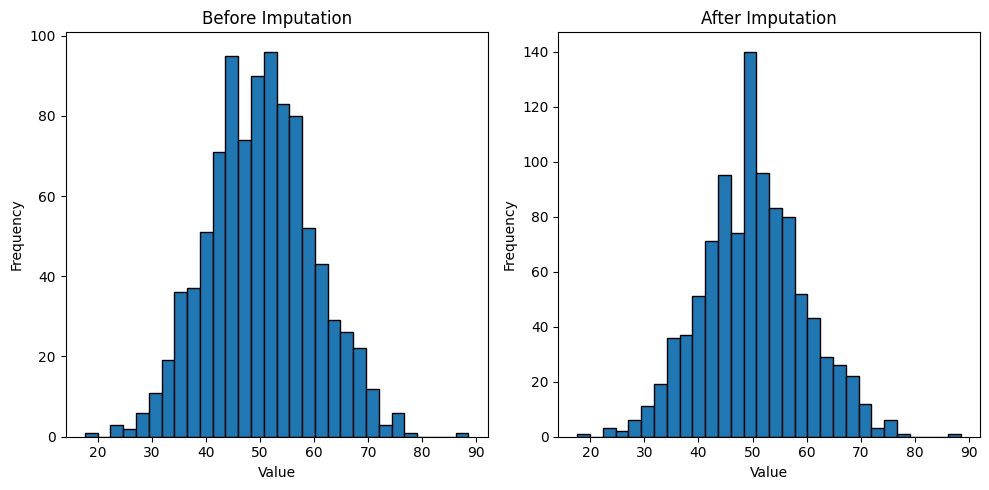

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)  
data = np.random.normal(loc=50, scale=10, size=1000)  

missing_indices = np.random.choice(1000, 50, replace=False)
data[missing_indices] = np.nan

df = pd.DataFrame(data, columns=['Value'])

df_imputed = df.copy()
df_imputed['Value'].fillna(df['Value'].mean(), inplace=True)

plt.figure(figsize=(10, 5))

# Before imputation
plt.subplot(1, 2, 1)
plt.hist(df['Value'], bins=30, edgecolor='black')
plt.title("Before Imputation")
plt.xlabel("Value")
plt.ylabel("Frequency")

# After imputation
plt.subplot(1, 2, 2)
plt.hist(df_imputed['Value'], bins=30, edgecolor='black')
plt.title("After Imputation")
plt.xlabel("Value")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


9. Implement Min-Max scaling on the following list of numbers [2, 5, 10, 15,
20] using sklearn.preprocessing.MinMaxScaler. Print the scaled array.

In [6]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

data = np.array([2, 5, 10, 15, 20]).reshape(-1, 1)

scaler = MinMaxScaler()

scaled_data = scaler.fit_transform(data)

print("Original Data:\n", data.flatten())
print("Scaled Data:\n", scaled_data.flatten())


Original Data:
 [ 2  5 10 15 20]
Scaled Data:
 [0.         0.16666667 0.44444444 0.72222222 1.        ]


10. You are working as a data scientist for a retail company. You receive a customer
transaction dataset that contains:

    ● Missing ages,

    ● Outliers in transaction amount,

    ● A highly imbalanced target (fraud vs. non-fraud),

    ● Categorical variables like payment method.
    
    Explain the step-by-step data preparation plan you’d follow before training a machine learning
model. Include how you’d address missing data, outliers, imbalance, and encoding.

    - Missing Ages: eplace missing ages with the median age (median is better than mean when data has outliers).

    Outliers in transaction amount: Log transform> Outliers in transaction amount, Flag them> add a column like is_high_amount.

    A highly imbalanced target (fraud vs. non-fraud): Use class weights so the model pays more attention to the minority class or oversample fraud cases.

    Categorical variables like payment method: As Machine learning models only understand numbers, convert categories to numbers using One-Hot Encoding.

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.ensemble import RandomForestClassifier

num_cols = ['txn_amount', 'age', 'other_num_features']
cat_cols = ['payment_method', 'device_type']

num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()),
])

cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype=int)),
])

preprocessor = ColumnTransformer([
    ('num', num_pipe, num_cols),
    ('cat', cat_pipe, cat_cols),
])

clf = RandomForestClassifier(class_weight='balanced', random_state=42)

pipeline = ImbPipeline([
    ('pre', preprocessor),
    ('smote', SMOTE(random_state=42)),   # optional — try both with and without
    ('clf', clf),
])
